# Prediciting Acoustic log value using Ensemble learning

In [ ]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import missingno as mno
import warnings 
warnings.filterwarnings('ignore')
print('done')

In [12]:
df_logs = pd.read_csv(r"logs.csv")

In [4]:
df_logs

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,...,TEMP,TENS,X,Y,Z,DEPT,ONSHORE,DIRSURVEY,WELLNAME,FORMATION
0,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,424403.93838,399869.55740,229.4244,27.5844,True,False,Ahuroa South B-1,NaN
1,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,424403.93838,399869.55740,229.5768,27.7368,True,False,Ahuroa South B-1,NaN
2,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,424403.93838,399869.55740,229.7292,27.8892,True,False,Ahuroa South B-1,NaN
3,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0429,NaN,424403.93838,399869.55740,229.8816,28.0416,True,False,Ahuroa South B-1,NaN
4,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0429,NaN,424403.93838,399869.55740,230.0340,28.1940,True,False,Ahuroa South B-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427373,8.50,7.4258,2.5177,NaN,322.75,NaN,0.10272,3.0684,NaN,NaN,...,NaN,NaN,349793.64843,416833.28361,4254.3380,4228.3380,False,False,Witiora-1,NaN
6427374,8.50,7.4258,2.5227,NaN,322.75,NaN,0.10181,3.0676,NaN,NaN,...,NaN,NaN,349793.64843,416833.28361,4254.4904,4228.4904,False,False,Witiora-1,NaN
6427375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0568,NaN,NaN,...,NaN,NaN,349793.64843,416833.28361,4254.6428,4228.6428,False,False,Witiora-1,NaN
6427376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0454,NaN,NaN,...,NaN,NaN,349793.64843,416833.28361,4254.7952,4228.7952,False,False,Witiora-1,NaN


<Axes: >

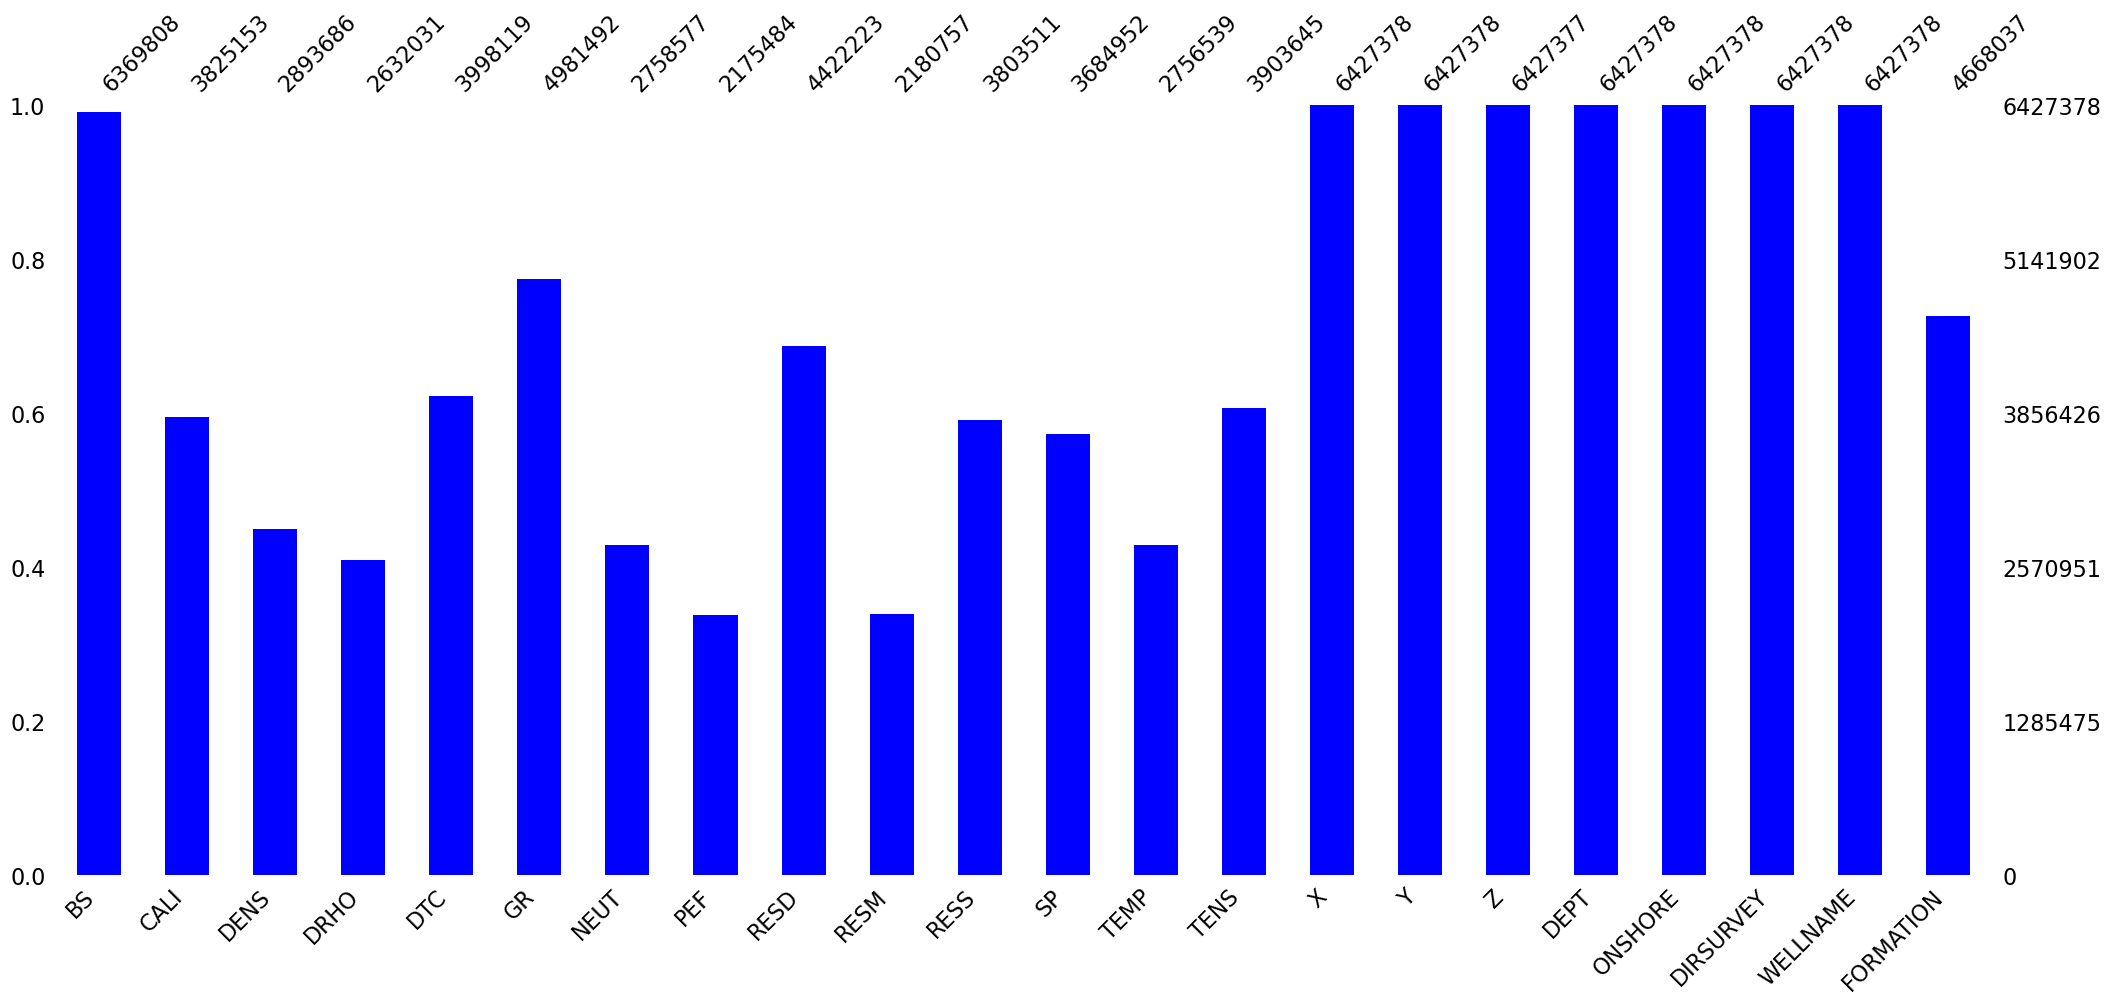

In [13]:
mno.bar(df_logs, color = 'blue')

In [14]:
df_logs = df_logs.drop(['X','Y','Z','ONSHORE','DIRSURVEY','FORMATION'], axis = 1)

In [15]:
df_logs

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS,DEPT,WELLNAME
0,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.5844,Ahuroa South B-1
1,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.7368,Ahuroa South B-1
2,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8892,Ahuroa South B-1
3,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0429,NaN,28.0416,Ahuroa South B-1
4,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0429,NaN,28.1940,Ahuroa South B-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427373,8.50,7.4258,2.5177,NaN,322.75,NaN,0.10272,3.0684,NaN,NaN,NaN,NaN,NaN,NaN,4228.3380,Witiora-1
6427374,8.50,7.4258,2.5227,NaN,322.75,NaN,0.10181,3.0676,NaN,NaN,NaN,NaN,NaN,NaN,4228.4904,Witiora-1
6427375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0568,NaN,NaN,NaN,NaN,NaN,NaN,4228.6428,Witiora-1
6427376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0454,NaN,NaN,NaN,NaN,NaN,NaN,4228.7952,Witiora-1


<Axes: >

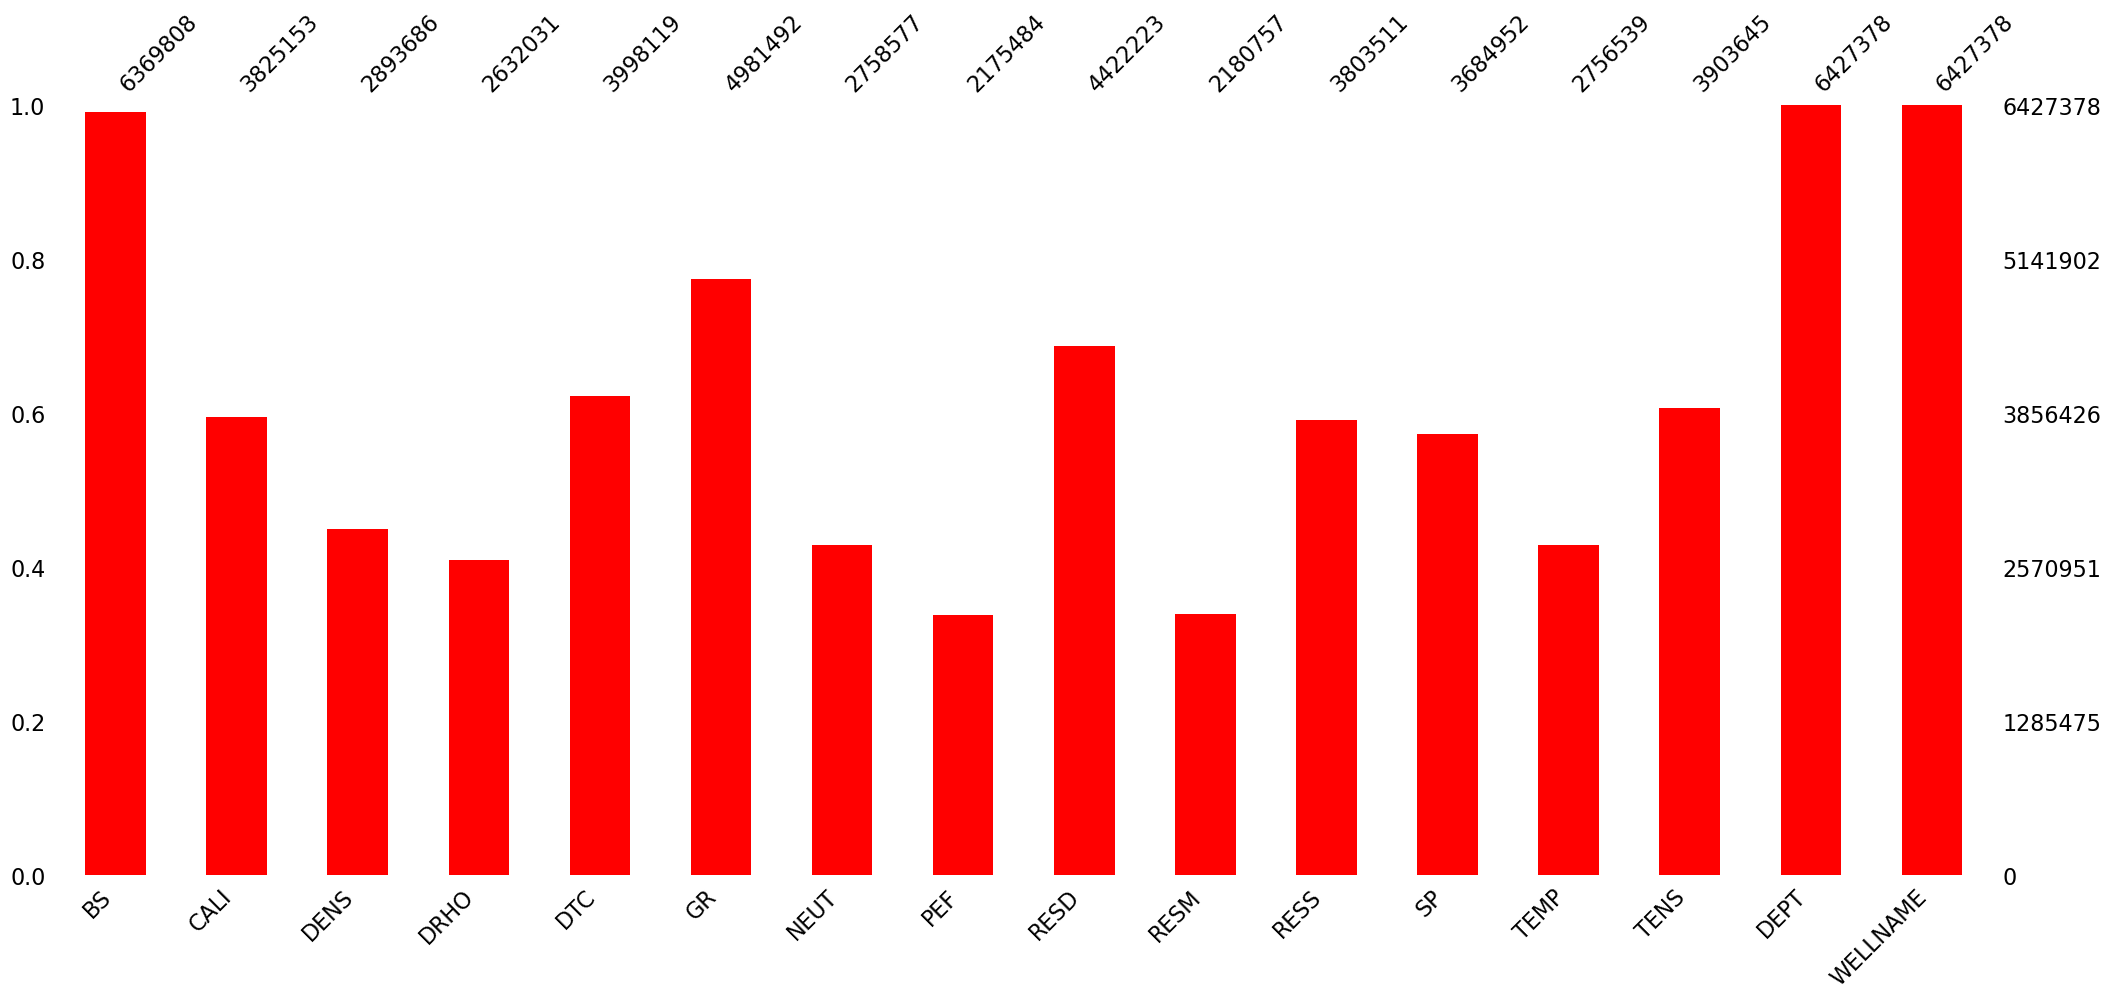

In [16]:
mno.bar(df_logs, color = 'red')

In [17]:
df_logs = df_logs.dropna()

<Axes: >

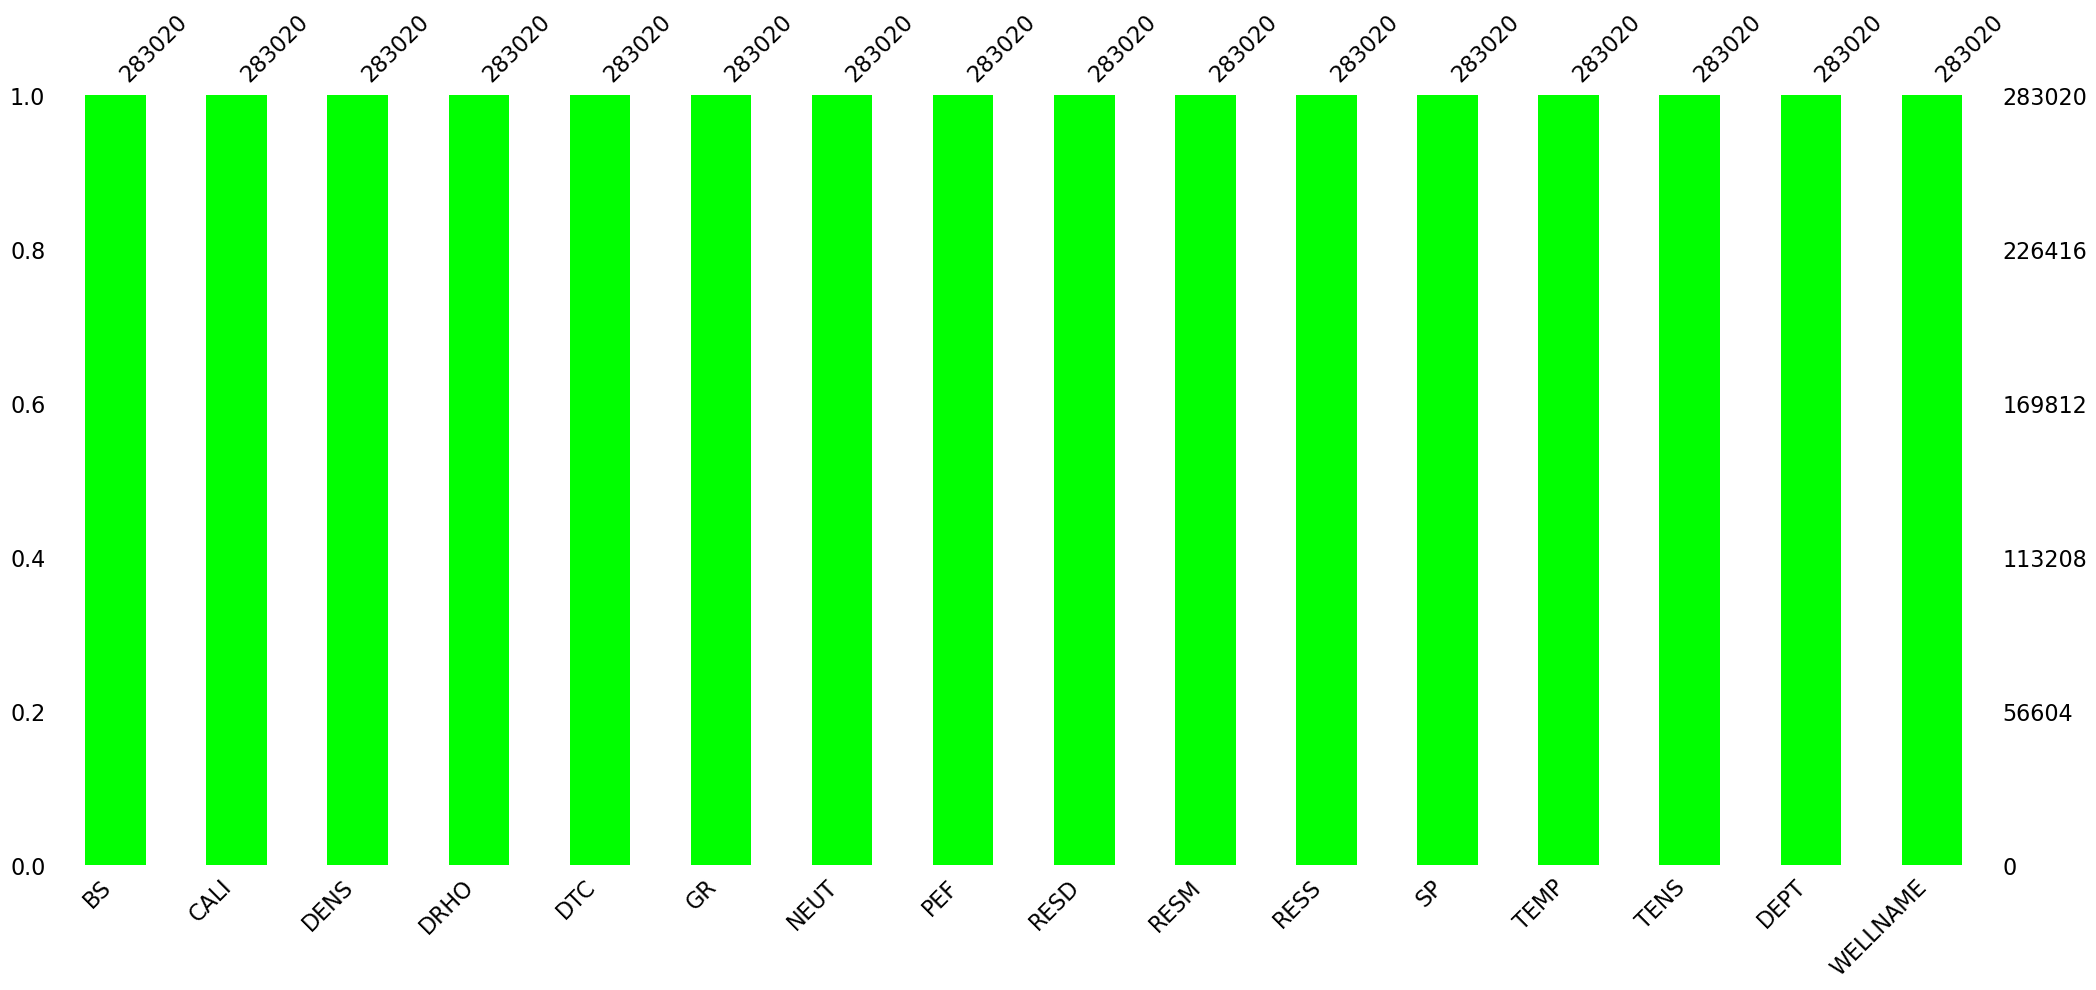

In [18]:
mno.bar(df_logs, color = 'lime')

In [19]:
df_logs.columns

Index(['BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'PEF', 'RESD',
       'RESM', 'RESS', 'SP', 'TEMP', 'TENS', 'DEPT', 'WELLNAME'],
      dtype='object')

In [20]:
# taking numerical data only for corr heratmap

data_corr = df_logs[['BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'PEF', 'RESD',
       'RESM', 'RESS', 'SP', 'TEMP', 'TENS', 'DEPT']]
data_corr

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS,DEPT
14724,8.5,9.6762,2.4172,0.19349,88.5604,79.8560,0.26546,4.6317,3.1929,3.2431,3.3744,-59.6320,64.3827,1740.1649,2271.5220
14725,8.5,9.6358,2.4133,0.20460,88.5198,77.8137,0.27907,4.7283,3.1601,3.1975,3.3429,-59.5603,64.3827,1741.0067,2271.6744
14726,8.5,9.5954,2.4095,0.21571,88.4792,75.7714,0.29268,4.8248,3.1272,3.1519,3.3114,-59.4886,64.3827,1741.8485,2271.8268
14727,8.5,9.5550,2.4056,0.22682,88.4386,73.7291,0.30628,4.9214,3.0944,3.1062,3.2799,-59.4169,64.3827,1742.6903,2271.9792
14728,8.5,9.5708,2.4316,0.23459,86.4784,70.4361,0.28857,4.9760,3.3509,3.3570,3.5188,-59.3216,64.3827,1740.4895,2272.1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218036,8.5,8.4475,2.6471,0.01728,75.7843,93.0777,0.33700,3.6913,10.2750,10.6517,10.6573,-927.4003,137.3239,2762.9331,4644.3900
6218037,8.5,8.4481,2.6599,0.02014,74.4564,91.1269,0.32279,3.7640,10.5500,10.9318,11.1099,-927.8002,137.3273,2769.7969,4644.5424
6218038,8.5,8.4511,2.6769,0.01402,73.8498,87.4841,0.31240,3.7414,12.3616,12.7089,14.1715,-927.3880,137.3306,2773.0664,4644.6948
6218039,8.5,8.4540,2.6939,0.00789,73.2431,83.8412,0.30202,3.7187,14.1732,14.4859,17.2332,-926.9758,137.3340,2776.3359,4644.8472


Text(0.5, 1.0, "Pearson's-Correlation Heatmap")

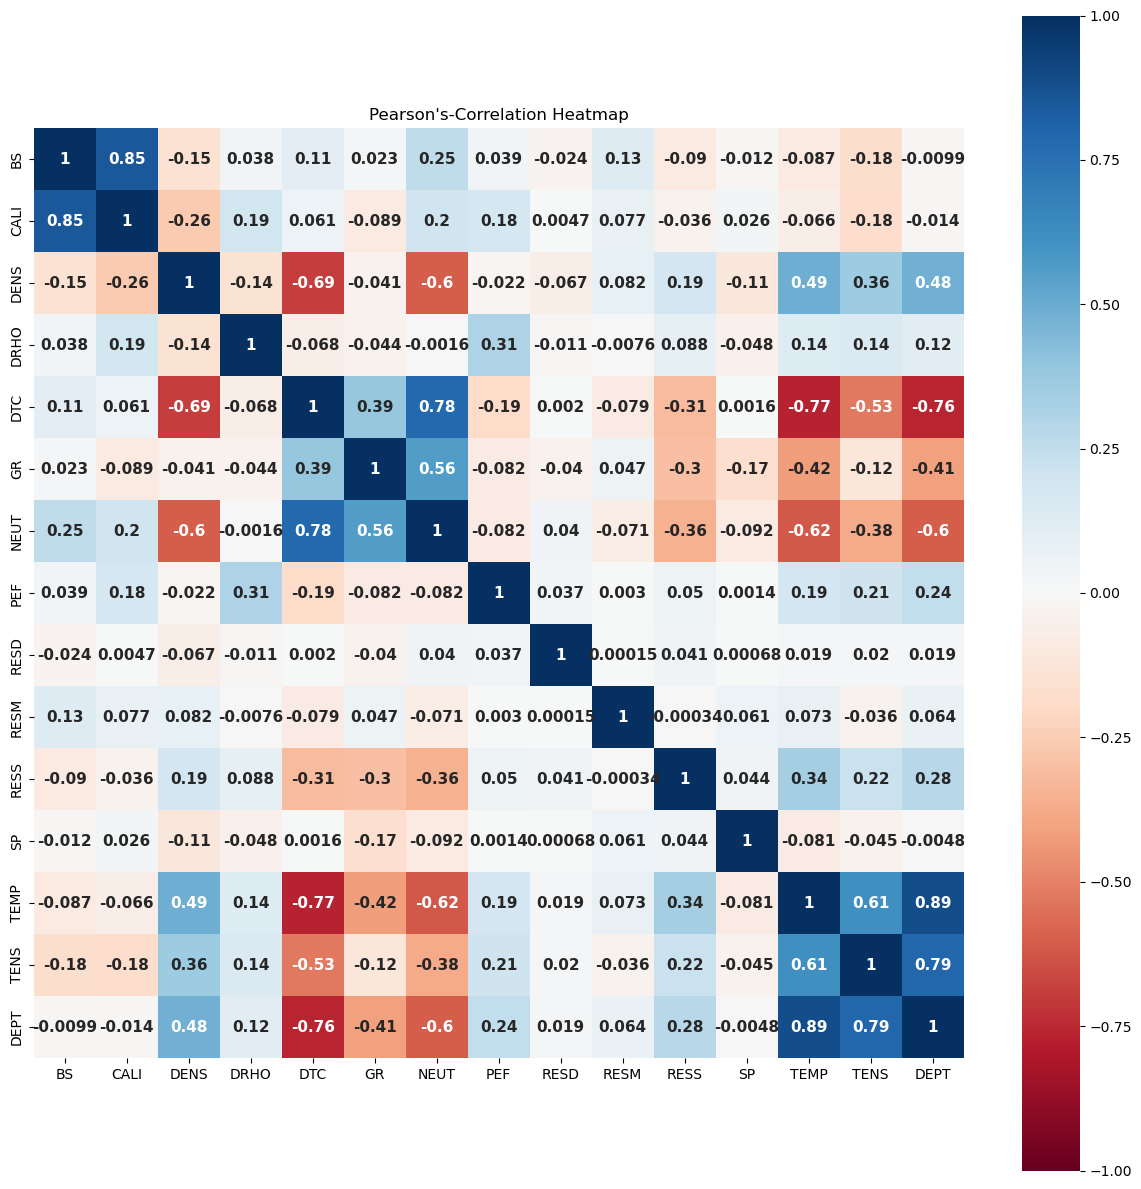

In [21]:
# correlation heatmap 1
corr = data_corr.corr(method = 'pearson')
plt.figure(figsize = (15,15)) #RdBu
h_map = sns.heatmap(corr, cmap = 'RdBu', vmin = -1, vmax = 1, annot = True, square = True,
            annot_kws = {'fontsize': 11, 'fontweight':'bold'})
plt.title("Pearson's-Correlation Heatmap")

Text(0.5, 1.0, "Spearman's-Correlation Heatmap")

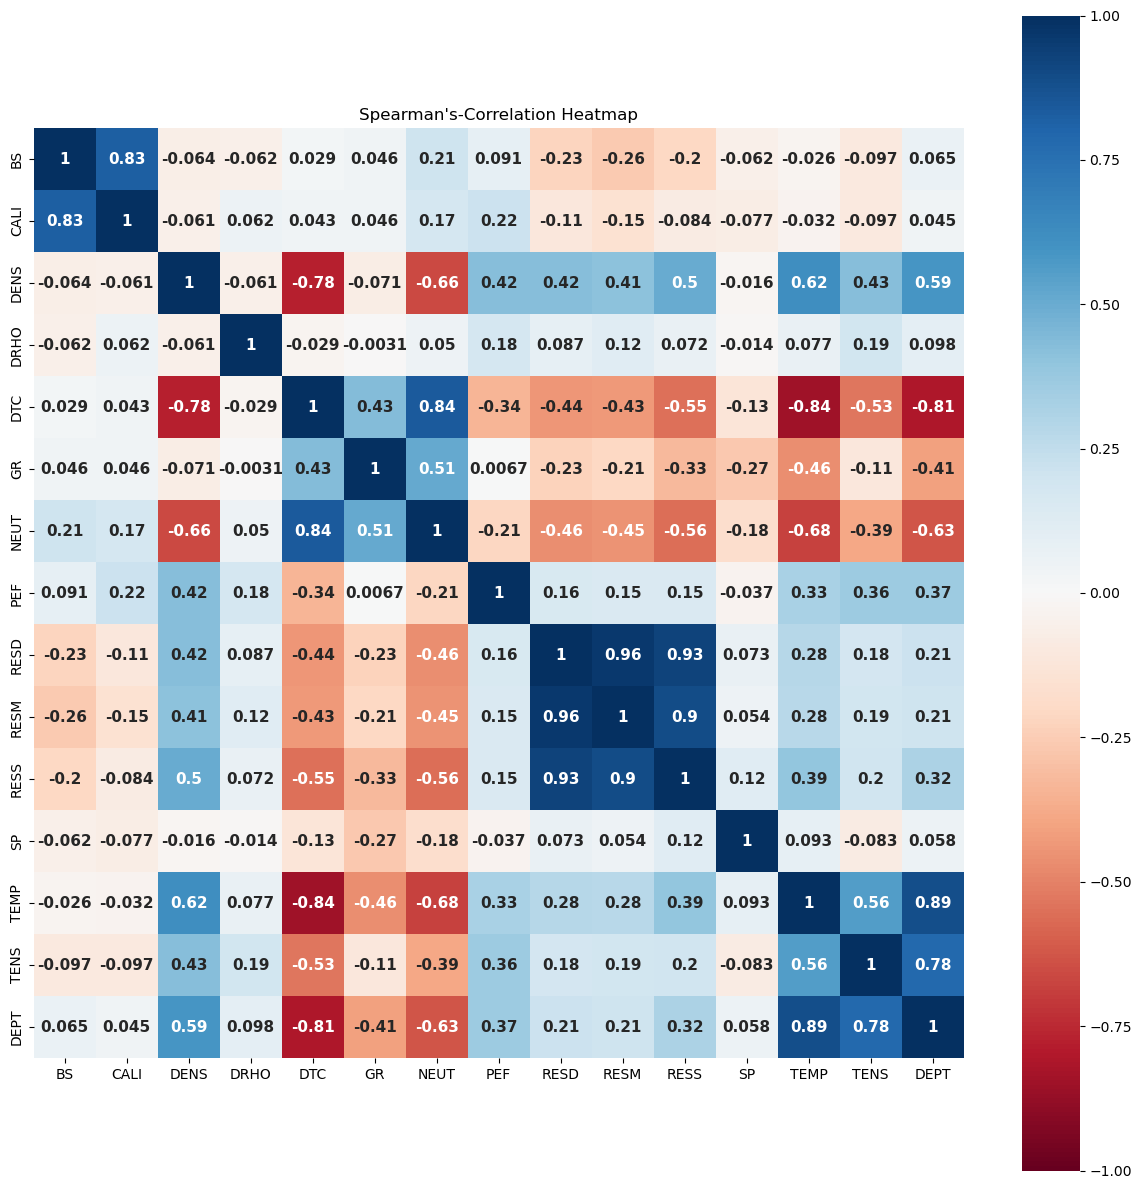

In [22]:
# correlation heatmap 1
corr = data_corr.corr(method = 'spearman')
plt.figure(figsize = (15,15)) #RdBu
h_map = sns.heatmap(corr, cmap = 'RdBu', vmin = -1, vmax = 1, annot = True, square = True,
            annot_kws = {'fontsize': 11, 'fontweight':'bold'})
plt.title("Spearman's-Correlation Heatmap")

# Well names in the dataset

In [23]:
print(df_logs['WELLNAME'].unique())
print('Total wells in the cleaned dataset',len(df_logs['WELLNAME'].unique()))

['Ahuroa South B-1' 'Ahuroa-4' 'Ahuroa-5 ST1' 'Albacore-1' 'Amokura-1'
 'Bluff-1' 'Cheal B-3' 'Cheal-A6 ST1' 'Cheal-A6' 'Cheal-B4'
 'Cheal-B-H1-MM' 'Hoki-1' 'Kahili-1C' 'Kaimiro-7ST1' 'Kapuni-15'
 'Kapuni-18' 'Kopuwai-1' 'Kora-1' 'Kowhai-A1' 'Kupe South-1'
 'Kupe South-2' 'Kupe South-4' 'Kupe South-5' 'Kupe South-6' 'Maari-2'
 'Maui-5' 'Maui-6' 'Maui-7' 'Miromiro-1' 'Mokau-1' 'Okoki-1' 'Oru-1'
 'Pukeko-1' 'Ratanui-1' 'Salisbury-1 ST1' 'Sidewinder-1' 'Supplejack-1'
 'Taranga-1' 'Toko-2' 'Toru-1' 'Trapper-A1' 'Tuatara-1' 'Tui SW-2'
 'Turangi-1' 'Turangi-3' 'Waihapa-2' 'Waimanu-1']
Total wells in the cleaned dataset 47


In [ ]:
# wellname_list = df_logs3['WELLNAME'].unique()

# for i in range(len(df_logs3['WELLNAME'].unique())):
#     well_name = wellname_list[i]
#     well_data = df_logs3[df_logs3['WELLNAME'] == wellname_list[i]]
#     fig, axes = plt.subplots(figsize=(10,10))

#     curve_names = ['DENS', 'NEUT', 'TEMP', 'DTC']

#     ax1 = plt.subplot2grid((1,4), (0,0), rowspan = 1, colspan = 1)
#     ax2 = plt.subplot2grid((1,4), (0,1), rowspan = 1, colspan = 1)
#     ax3 = plt.subplot2grid((1,4), (0,2), rowspan = 1, colspan = 1)
#     ax4 = plt.subplot2grid((1,4), (0,3), rowspan = 1, colspan = 1)

#     ax1.plot('DENS','DEPT', data = well_data, color = 'red', lw = 0.5)
#     ax2.plot('NEUT','DEPT', data = well_data, color = 'blue', lw = 0.5)
#     ax3.plot('TEMP','DEPT', data = well_data, color = 'black', lw = 0.5)
#     ax4.plot('DTC','DEPT', data = well_data, color = 'magenta', lw = 0.5)
#     plt.suptitle(well_name)

#     for i, ax in enumerate(fig.axes):
#         ax.set_ylim(max(well_data['DEPT'])+10, min(well_data['DEPT'])+10)
#         ax.grid()
#         ax.set_xlabel(curve_names[i])

#     for ax in [ax2,ax3,ax4]:
#         plt.setp(ax.get_yticklabels(), visible = False)

#     fig.subplots_adjust(wspace = 0.1)
#     fig.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=0.1, hspace=None)
#     fig.savefig(f"{well_name}.png")
    
# # temp1 = df_logs3[df_logs3['WELLNAME'] == 'Kupe South-2']
# # plt.plot(temp1['DTC'],temp1['DEPT'])
# # plt.grid()

<Axes: xlabel='DEPT', ylabel='Count'>

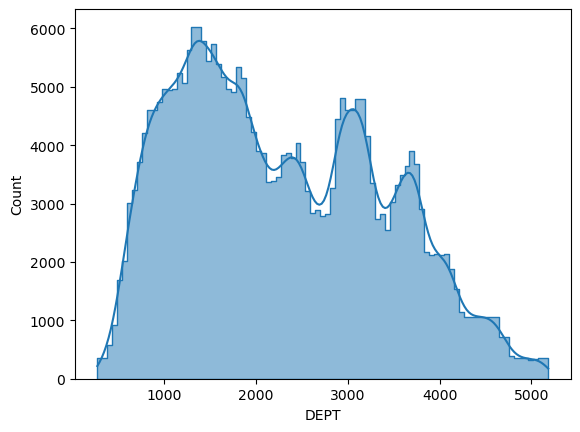

In [24]:
sns.histplot(data_corr['DEPT'], kde = True,element = "step")

<Axes: xlabel='DEPT', ylabel='DTC'>

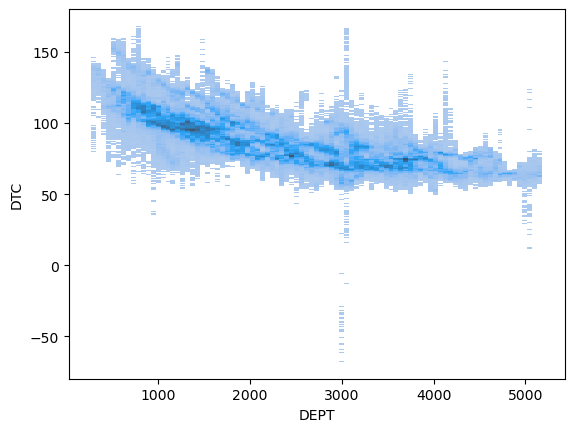

In [25]:
sns.histplot(x= data_corr['DEPT'],y=data_corr['DTC'], kde = True,element = "step")

<Axes: xlabel='DEPT', ylabel='NEUT'>

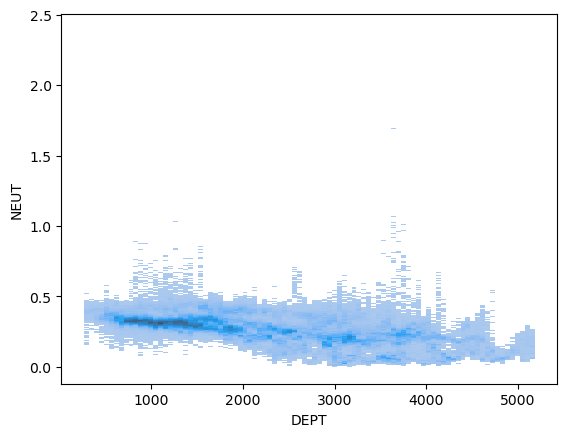

In [26]:
sns.histplot(x= data_corr['DEPT'],y=data_corr['NEUT'], kde = True,element = "step")

<Axes: xlabel='DEPT', ylabel='DENS'>

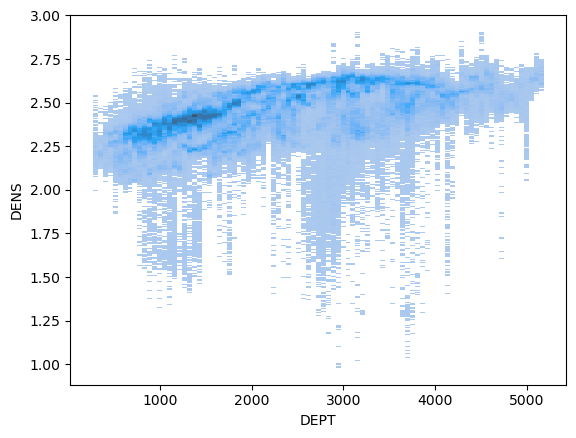

In [27]:
sns.histplot(x= data_corr['DEPT'],y=data_corr['DENS'], kde = True,element = "step")


In [29]:
data_corr.columns

Index(['BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'PEF', 'RESD',
       'RESM', 'RESS', 'SP', 'TEMP', 'TENS', 'DEPT'],
      dtype='object')

In [30]:
#sns.pairplot(data_corr[['DENS', 'DTC', 'GR', 'NEUT', 'TEMP', 'DEPT']])

In [31]:
df_test_unseen = df_logs[df_logs['WELLNAME'] == 'Maui-6']
df_test_unseen  # Maui-6 is taken as unseen well it will be removed from the training dataset

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS,DEPT,WELLNAME
2892865,12.25,17.7214,2.1487,-0.0250,156.8824,73.1188,0.41430,2.8535,0.7625,4.6605,0.7985,-35.6182,36.5815,504.1021,496.0620,Maui-6
2892866,12.25,17.7305,2.1532,-0.0273,156.5489,73.3247,0.39868,2.8854,0.7898,3.2559,0.8175,-35.7843,36.5926,502.5190,496.2144,Maui-6
2892867,12.25,17.7396,2.1577,-0.0295,156.2154,73.5306,0.38307,2.9172,0.8171,1.8512,0.8366,-35.9505,36.6036,500.9359,496.3668,Maui-6
2892868,12.25,17.7532,2.1605,-0.0314,155.9431,73.7607,0.37135,2.9387,0.8414,0.6185,0.8537,-36.1196,36.6093,499.8964,496.5192,Maui-6
2892869,12.25,17.7986,2.1513,-0.0310,156.0952,74.1585,0.38666,2.8887,0.8450,0.5789,0.8570,-36.3096,36.5784,502.6287,496.6716,Maui-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910711,8.50,8.1306,2.2974,0.0041,79.0114,47.2912,0.19963,2.7559,1.2698,1.2958,1.6891,-57.5005,97.4267,1330.4543,3215.7924,Maui-6
2910712,8.50,8.1349,2.3011,0.0041,78.9700,47.7268,0.19942,2.7227,1.3675,1.3794,1.8312,-57.4997,97.3776,1331.8687,3215.9448,Maui-6
2910713,8.50,8.1386,2.3078,0.0030,78.3648,47.7752,0.19970,2.7491,1.4954,1.4951,2.0238,-57.4943,97.3853,1333.1067,3216.0972,Maui-6
2910714,8.50,8.1419,2.3163,0.0013,77.4395,47.6036,0.20027,2.8094,1.6403,1.6289,2.2451,-57.4865,97.4251,1334.2445,3216.2496,Maui-6


In [32]:
#drop based on condition

# Get index for drop condition
index_def = df_logs[df_logs['WELLNAME'] == 'Maui-6'].index
print(index_def)

df_logs.drop(index_def, inplace =True)

Int64Index([2892865, 2892866, 2892867, 2892868, 2892869, 2892870, 2892871,
            2892872, 2892873, 2892874,
            ...
            2910706, 2910707, 2910708, 2910709, 2910710, 2910711, 2910712,
            2910713, 2910714, 2910715],
           dtype='int64', length=17437)


In [33]:
df_logs

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS,DEPT,WELLNAME
14724,8.5,9.6762,2.4172,0.19349,88.5604,79.8560,0.26546,4.6317,3.1929,3.2431,3.3744,-59.6320,64.3827,1740.1649,2271.5220,Ahuroa South B-1
14725,8.5,9.6358,2.4133,0.20460,88.5198,77.8137,0.27907,4.7283,3.1601,3.1975,3.3429,-59.5603,64.3827,1741.0067,2271.6744,Ahuroa South B-1
14726,8.5,9.5954,2.4095,0.21571,88.4792,75.7714,0.29268,4.8248,3.1272,3.1519,3.3114,-59.4886,64.3827,1741.8485,2271.8268,Ahuroa South B-1
14727,8.5,9.5550,2.4056,0.22682,88.4386,73.7291,0.30628,4.9214,3.0944,3.1062,3.2799,-59.4169,64.3827,1742.6903,2271.9792,Ahuroa South B-1
14728,8.5,9.5708,2.4316,0.23459,86.4784,70.4361,0.28857,4.9760,3.3509,3.3570,3.5188,-59.3216,64.3827,1740.4895,2272.1316,Ahuroa South B-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218036,8.5,8.4475,2.6471,0.01728,75.7843,93.0777,0.33700,3.6913,10.2750,10.6517,10.6573,-927.4003,137.3239,2762.9331,4644.3900,Waimanu-1
6218037,8.5,8.4481,2.6599,0.02014,74.4564,91.1269,0.32279,3.7640,10.5500,10.9318,11.1099,-927.8002,137.3273,2769.7969,4644.5424,Waimanu-1
6218038,8.5,8.4511,2.6769,0.01402,73.8498,87.4841,0.31240,3.7414,12.3616,12.7089,14.1715,-927.3880,137.3306,2773.0664,4644.6948,Waimanu-1
6218039,8.5,8.4540,2.6939,0.00789,73.2431,83.8412,0.30202,3.7187,14.1732,14.4859,17.2332,-926.9758,137.3340,2776.3359,4644.8472,Waimanu-1


In [34]:
df_logs[df_logs['WELLNAME'] == 'Maui-6']   #the unseen well Maui-6 is removed from the daatset used for training

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS,DEPT,WELLNAME


In [35]:
df_logs

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS,DEPT,WELLNAME
14724,8.5,9.6762,2.4172,0.19349,88.5604,79.8560,0.26546,4.6317,3.1929,3.2431,3.3744,-59.6320,64.3827,1740.1649,2271.5220,Ahuroa South B-1
14725,8.5,9.6358,2.4133,0.20460,88.5198,77.8137,0.27907,4.7283,3.1601,3.1975,3.3429,-59.5603,64.3827,1741.0067,2271.6744,Ahuroa South B-1
14726,8.5,9.5954,2.4095,0.21571,88.4792,75.7714,0.29268,4.8248,3.1272,3.1519,3.3114,-59.4886,64.3827,1741.8485,2271.8268,Ahuroa South B-1
14727,8.5,9.5550,2.4056,0.22682,88.4386,73.7291,0.30628,4.9214,3.0944,3.1062,3.2799,-59.4169,64.3827,1742.6903,2271.9792,Ahuroa South B-1
14728,8.5,9.5708,2.4316,0.23459,86.4784,70.4361,0.28857,4.9760,3.3509,3.3570,3.5188,-59.3216,64.3827,1740.4895,2272.1316,Ahuroa South B-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218036,8.5,8.4475,2.6471,0.01728,75.7843,93.0777,0.33700,3.6913,10.2750,10.6517,10.6573,-927.4003,137.3239,2762.9331,4644.3900,Waimanu-1
6218037,8.5,8.4481,2.6599,0.02014,74.4564,91.1269,0.32279,3.7640,10.5500,10.9318,11.1099,-927.8002,137.3273,2769.7969,4644.5424,Waimanu-1
6218038,8.5,8.4511,2.6769,0.01402,73.8498,87.4841,0.31240,3.7414,12.3616,12.7089,14.1715,-927.3880,137.3306,2773.0664,4644.6948,Waimanu-1
6218039,8.5,8.4540,2.6939,0.00789,73.2431,83.8412,0.30202,3.7187,14.1732,14.4859,17.2332,-926.9758,137.3340,2776.3359,4644.8472,Waimanu-1


In [36]:
print(df_logs['WELLNAME'].unique())
print('Total wells in the cleaned dataset',len(df_logs['WELLNAME'].unique()))
# the training dataset does not have Maui-6 (test well)

['Ahuroa South B-1' 'Ahuroa-4' 'Ahuroa-5 ST1' 'Albacore-1' 'Amokura-1'
 'Bluff-1' 'Cheal B-3' 'Cheal-A6 ST1' 'Cheal-A6' 'Cheal-B4'
 'Cheal-B-H1-MM' 'Hoki-1' 'Kahili-1C' 'Kaimiro-7ST1' 'Kapuni-15'
 'Kapuni-18' 'Kopuwai-1' 'Kora-1' 'Kowhai-A1' 'Kupe South-1'
 'Kupe South-2' 'Kupe South-4' 'Kupe South-5' 'Kupe South-6' 'Maari-2'
 'Maui-5' 'Maui-7' 'Miromiro-1' 'Mokau-1' 'Okoki-1' 'Oru-1' 'Pukeko-1'
 'Ratanui-1' 'Salisbury-1 ST1' 'Sidewinder-1' 'Supplejack-1' 'Taranga-1'
 'Toko-2' 'Toru-1' 'Trapper-A1' 'Tuatara-1' 'Tui SW-2' 'Turangi-1'
 'Turangi-3' 'Waihapa-2' 'Waimanu-1']
Total wells in the cleaned dataset 46


Text(0.5, 1.0, "Spearman's-Correlation Heatmap")

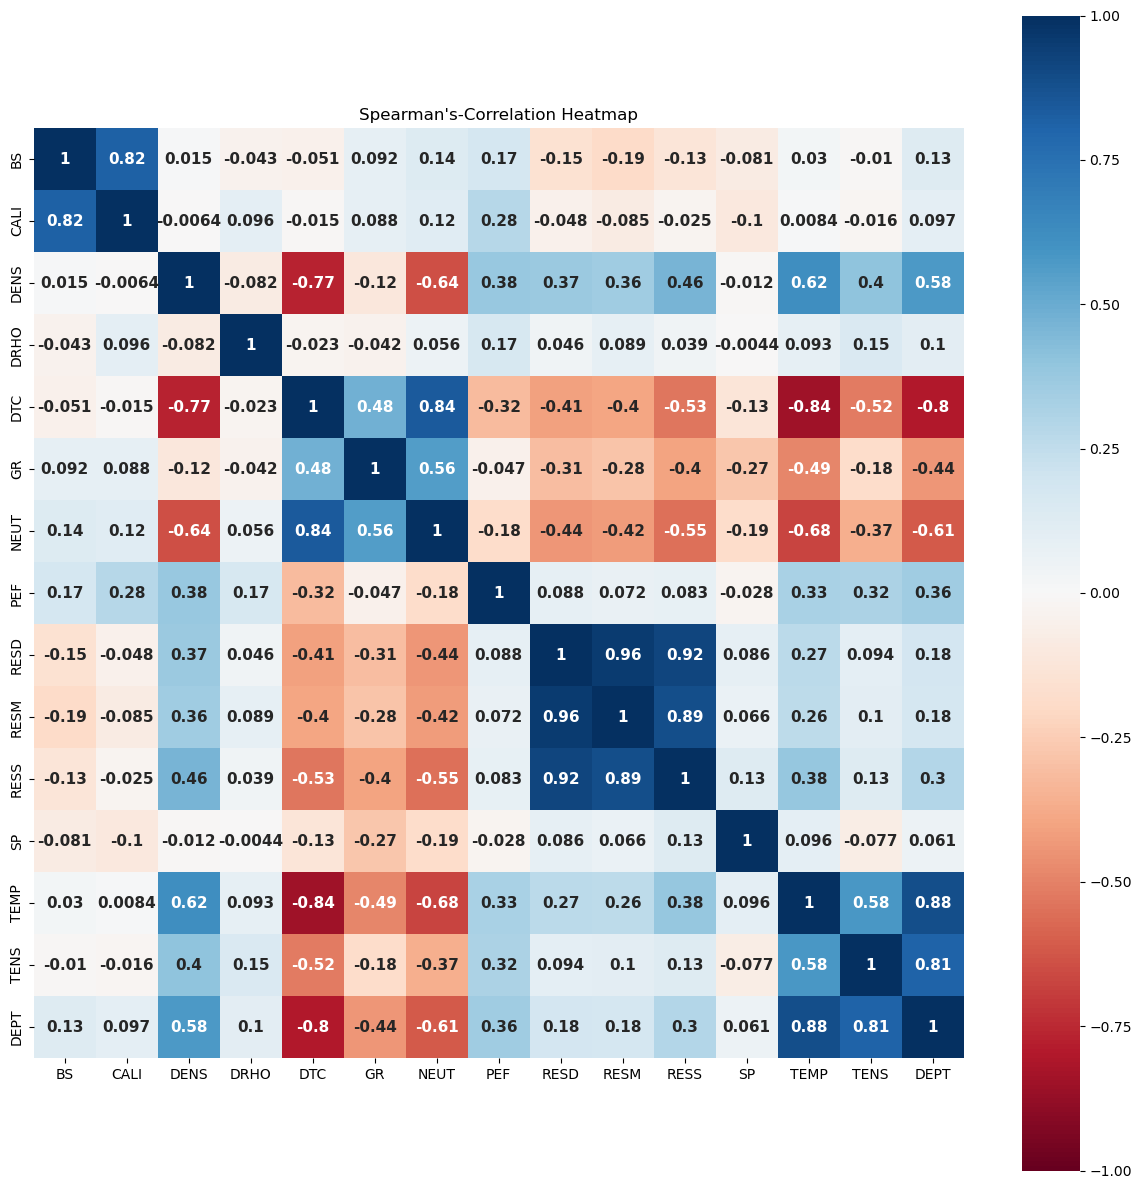

In [37]:
# correlation heatmap 1
corr = df_logs.corr(method = 'spearman')
plt.figure(figsize = (15,15)) #RdBu
h_map = sns.heatmap(corr, cmap = 'RdBu', vmin = -1, vmax = 1, annot = True, square = True,
            annot_kws = {'fontsize': 11, 'fontweight':'bold'})
plt.title("Spearman's-Correlation Heatmap")

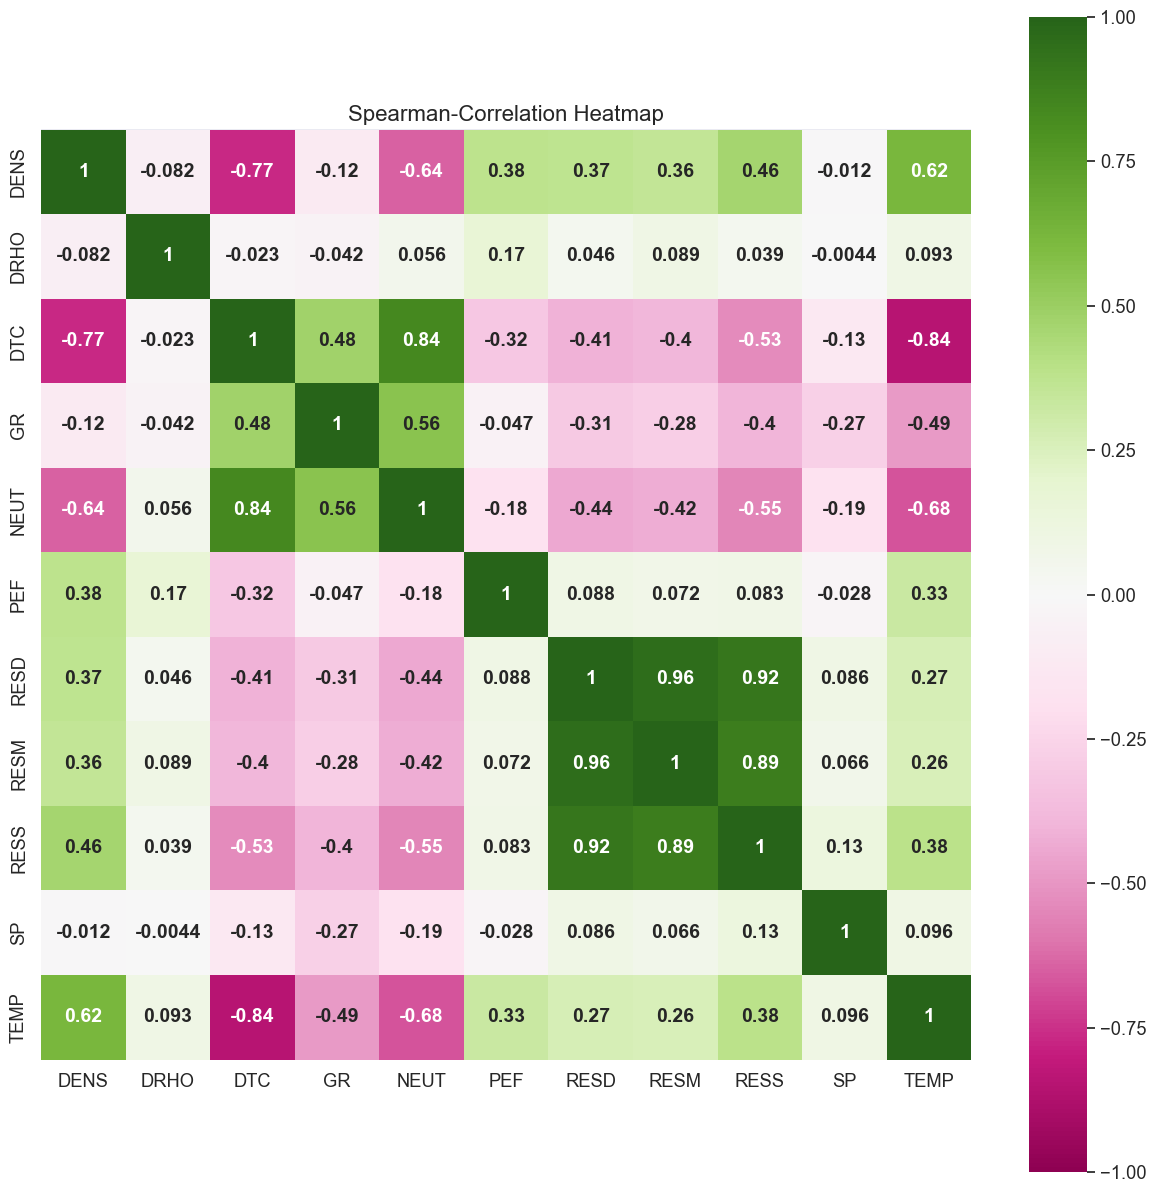

In [39]:
# correlation heatmap 1
corr = df_logs[['DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'PEF',
       'RESD', 'RESM', 'RESS', 'SP', 'TEMP']].corr(method = 'spearman')
plt.figure(figsize = (15,15)) #RdBu
h_map = sns.heatmap(corr, cmap = 'PiYG', vmin = -1, vmax = 1, annot = True, square = True,
            annot_kws = {'fontsize': 14, 'fontweight':'bold'})
sns.set(font_scale=1.2)
plt.title("Spearman-Correlation Heatmap", fontsize= 16)

plt.savefig('Heatmap_training data.png', dpi = 1200,  bbox_inches='tight')
plt.show()

# Training data


In [40]:
df_training = df_logs  #data of 46 unique well

In [41]:
df_training.shape

(265583, 16)

# Test data

In [42]:
df_test_unseen  # Well name: Maui-6

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS,DEPT,WELLNAME
2892865,12.25,17.7214,2.1487,-0.0250,156.8824,73.1188,0.41430,2.8535,0.7625,4.6605,0.7985,-35.6182,36.5815,504.1021,496.0620,Maui-6
2892866,12.25,17.7305,2.1532,-0.0273,156.5489,73.3247,0.39868,2.8854,0.7898,3.2559,0.8175,-35.7843,36.5926,502.5190,496.2144,Maui-6
2892867,12.25,17.7396,2.1577,-0.0295,156.2154,73.5306,0.38307,2.9172,0.8171,1.8512,0.8366,-35.9505,36.6036,500.9359,496.3668,Maui-6
2892868,12.25,17.7532,2.1605,-0.0314,155.9431,73.7607,0.37135,2.9387,0.8414,0.6185,0.8537,-36.1196,36.6093,499.8964,496.5192,Maui-6
2892869,12.25,17.7986,2.1513,-0.0310,156.0952,74.1585,0.38666,2.8887,0.8450,0.5789,0.8570,-36.3096,36.5784,502.6287,496.6716,Maui-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910711,8.50,8.1306,2.2974,0.0041,79.0114,47.2912,0.19963,2.7559,1.2698,1.2958,1.6891,-57.5005,97.4267,1330.4543,3215.7924,Maui-6
2910712,8.50,8.1349,2.3011,0.0041,78.9700,47.7268,0.19942,2.7227,1.3675,1.3794,1.8312,-57.4997,97.3776,1331.8687,3215.9448,Maui-6
2910713,8.50,8.1386,2.3078,0.0030,78.3648,47.7752,0.19970,2.7491,1.4954,1.4951,2.0238,-57.4943,97.3853,1333.1067,3216.0972,Maui-6
2910714,8.50,8.1419,2.3163,0.0013,77.4395,47.6036,0.20027,2.8094,1.6403,1.6289,2.2451,-57.4865,97.4251,1334.2445,3216.2496,Maui-6


In [43]:
df_test_unseen.shape

(17437, 16)

In [44]:
df_test_unseen.describe()

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS,DEPT
count,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.00000,17437.000000,17437.000000,17437.000000
mean,10.757269,11.413491,2.307110,-0.002629,101.688400,77.444747,0.318898,2.936228,2.372846,2.406978,2.720916,-33.90915,62.697587,939.745659,1846.635301
std,1.835671,2.091304,0.170601,0.021202,22.780875,13.216338,0.087742,0.401575,1.764867,6.871505,2.193881,13.58259,18.722328,229.251313,787.795421
min,8.500000,8.122600,1.390000,-0.252800,35.722300,27.567000,0.022700,1.900100,0.575700,0.351000,0.570000,-66.09900,36.497500,499.896400,496.062000
25%,8.500000,9.588100,2.159400,-0.012600,82.529700,70.302200,0.258360,2.706900,1.268200,0.920300,1.278400,-41.40760,45.997400,756.944600,1160.983200
50%,12.250000,12.115000,2.300200,-0.006800,95.092300,80.204500,0.330910,2.868100,1.695300,1.347600,1.787200,-35.72180,59.067900,986.560900,1840.077600
75%,12.250000,12.414100,2.448700,0.000900,121.464800,86.447000,0.390720,3.133900,3.126400,3.070900,3.705800,-28.94990,79.155700,1112.616200,2533.345200
max,12.250000,20.954800,2.687400,0.294500,166.861700,143.357200,0.533690,5.302800,24.317600,259.361000,32.181500,37.13740,97.699100,1458.173800,3216.402000


In [45]:
df_test_unseen[['DTC','DENS','NEUT', 'RESS','RESM','TEMP']].describe()

,DTC,DENS,NEUT,RESS,RESM,TEMP
count,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000
mean,101.688400,2.307110,0.318898,2.720916,2.406978,62.697587
std,22.780875,0.170601,0.087742,2.193881,6.871505,18.722328
min,35.722300,1.390000,0.022700,0.570000,0.351000,36.497500
25%,82.529700,2.159400,0.258360,1.278400,0.920300,45.997400
50%,95.092300,2.300200,0.330910,1.787200,1.347600,59.067900
75%,121.464800,2.448700,0.390720,3.705800,3.070900,79.155700
max,166.861700,2.687400,0.533690,32.181500,259.361000,97.699100


In [46]:
df_test_unseen.reset_index()
df_test_unseen.to_csv(#### index =False)

In [47]:
df_test_unseen = df_test_unseen[['DTC','DENS','NEUT', 'RESS','RESM','TEMP']].reset_index()
df_test_unseen[['DTC','DENS','NEUT', 'RESS','RESM','TEMP']]

,DTC,DENS,NEUT,RESS,RESM,TEMP
0,156.8824,2.1487,0.41430,0.7985,4.6605,36.5815
1,156.5489,2.1532,0.39868,0.8175,3.2559,36.5926
2,156.2154,2.1577,0.38307,0.8366,1.8512,36.6036
3,155.9431,2.1605,0.37135,0.8537,0.6185,36.6093
4,156.0952,2.1513,0.38666,0.8570,0.5789,36.5784
...,...,...,...,...,...,...
17432,79.0114,2.2974,0.19963,1.6891,1.2958,97.4267
17433,78.9700,2.3011,0.19942,1.8312,1.3794,97.3776
17434,78.3648,2.3078,0.19970,2.0238,1.4951,97.3853
17435,77.4395,2.3163,0.20027,2.2451,1.6289,97.4251


In [48]:
df_training[['DTC','DENS','NEUT', 'RESS','RESM','TEMP']].describe()

,DTC,DENS,NEUT,RESS,RESM,TEMP
count,265583.000000,265583.000000,265583.000000,265583.000000,265583.000000,265583.000000
mean,87.554929,2.430732,0.265489,8.384086,5770.476451,68.139037
std,16.469601,0.157013,0.097476,14.574917,75656.411188,25.294507
min,-68.073100,0.978900,0.000300,0.269500,0.499600,27.081500
25%,74.269650,2.341400,0.207270,3.009200,3.041400,47.000000
50%,85.634400,2.435200,0.279490,5.184800,4.961600,64.382700
75%,99.243750,2.551200,0.328600,8.958950,9.906600,82.174150
max,168.408100,2.905700,2.383700,712.395200,1000000.000000,145.447800


In [49]:
print(df_training.shape)
index_drop = df_training[(df_training['DTC'] <0)].index
print(index_drop)
df_training.drop(index_drop, inplace = True)
print(df_training.shape)

(265583, 16)
Int64Index([6003871, 6003872, 6003873, 6003874, 6003875, 6003876, 6003877,
            6003878, 6003879, 6003880, 6003881, 6003882, 6003883, 6003884,
            6003885, 6003886, 6003887, 6003888, 6003889, 6003890, 6003891,
            6003892, 6003893, 6003894, 6003895, 6003896, 6003897, 6003898,
            6003899, 6003900],
           dtype='int64')
(265553, 16)


In [50]:
df_training[['DTC','DENS','NEUT', 'RESS','RESM','TEMP']].describe()

,DTC,DENS,NEUT,RESS,RESM,TEMP
count,265553.000000,265553.000000,265553.000000,265553.000000,265553.000000,265553.000000
mean,87.569531,2.430713,0.265506,8.379743,5771.122271,68.137988
std,16.412513,0.157012,0.097469,14.569593,75660.660203,25.295744
min,11.436900,0.978900,0.000300,0.269500,0.499600,27.081500
25%,74.271400,2.341400,0.207300,3.008900,3.041200,47.000000
50%,85.636400,2.435200,0.279500,5.184300,4.961000,64.382700
75%,99.245100,2.551200,0.328610,8.957000,9.901700,82.176300
max,168.408100,2.905700,2.383700,712.395200,1000000.000000,145.447800


In [51]:
# df_training[['DTC','DENS','NEUT', 'RESS','TEMP']]
df_training = df_training.reset_index()
df_training[['DTC','DENS','NEUT', 'RESS','RESM','TEMP']]

,DTC,DENS,NEUT,RESS,RESM,TEMP
0,88.5604,2.4172,0.26546,3.3744,3.2431,64.3827
1,88.5198,2.4133,0.27907,3.3429,3.1975,64.3827
2,88.4792,2.4095,0.29268,3.3114,3.1519,64.3827
3,88.4386,2.4056,0.30628,3.2799,3.1062,64.3827
4,86.4784,2.4316,0.28857,3.5188,3.3570,64.3827
...,...,...,...,...,...,...
265548,75.7843,2.6471,0.33700,10.6573,10.6517,137.3239
265549,74.4564,2.6599,0.32279,11.1099,10.9318,137.3273
265550,73.8498,2.6769,0.31240,14.1715,12.7089,137.3306
265551,73.2431,2.6939,0.30202,17.2332,14.4859,137.3340


# saving training and unseen test data (Maui-6)

In [100]:
a = df_training[['DTC','DENS','NEUT', 'RESS','RESM','TEMP']]
# a.to_csv(r"C: index =False)
# a
b = df_test_unseen[['DTC','DENS','NEUT', 'RESS','RESM','TEMP']]
# b.to_csv(r"C:, index =False)
# b


# Preparing the Random Forest model

In [58]:
# Evaluation parameters
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Model 1
from sklearn.linear_model import LinearRegression

# Model 2
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

# Model 2
import xgboost as xg

In [59]:
from sklearn.neural_network import MLPRegressor

## Selecting training and test features

In [52]:
X = df_training[['DENS','NEUT', 'RESS','RESM','TEMP']]
y = df_training['DTC']
print(len(X), len(y))

265553 265553


In [53]:
X

,DENS,NEUT,RESS,RESM,TEMP
0,2.4172,0.26546,3.3744,3.2431,64.3827
1,2.4133,0.27907,3.3429,3.1975,64.3827
2,2.4095,0.29268,3.3114,3.1519,64.3827
3,2.4056,0.30628,3.2799,3.1062,64.3827
4,2.4316,0.28857,3.5188,3.3570,64.3827
...,...,...,...,...,...
265548,2.6471,0.33700,10.6573,10.6517,137.3239
265549,2.6599,0.32279,11.1099,10.9318,137.3273
265550,2.6769,0.31240,14.1715,12.7089,137.3306
265551,2.6939,0.30202,17.2332,14.4859,137.3340


In [54]:
y

0         88.5604
1         88.5198
2         88.4792
3         88.4386
4         86.4784
           ...   
265548    75.7843
265549    74.4564
265550    73.8498
265551    73.2431
265552    72.6365
Name: DTC, Length: 265553, dtype: float64

# Distribution of training features

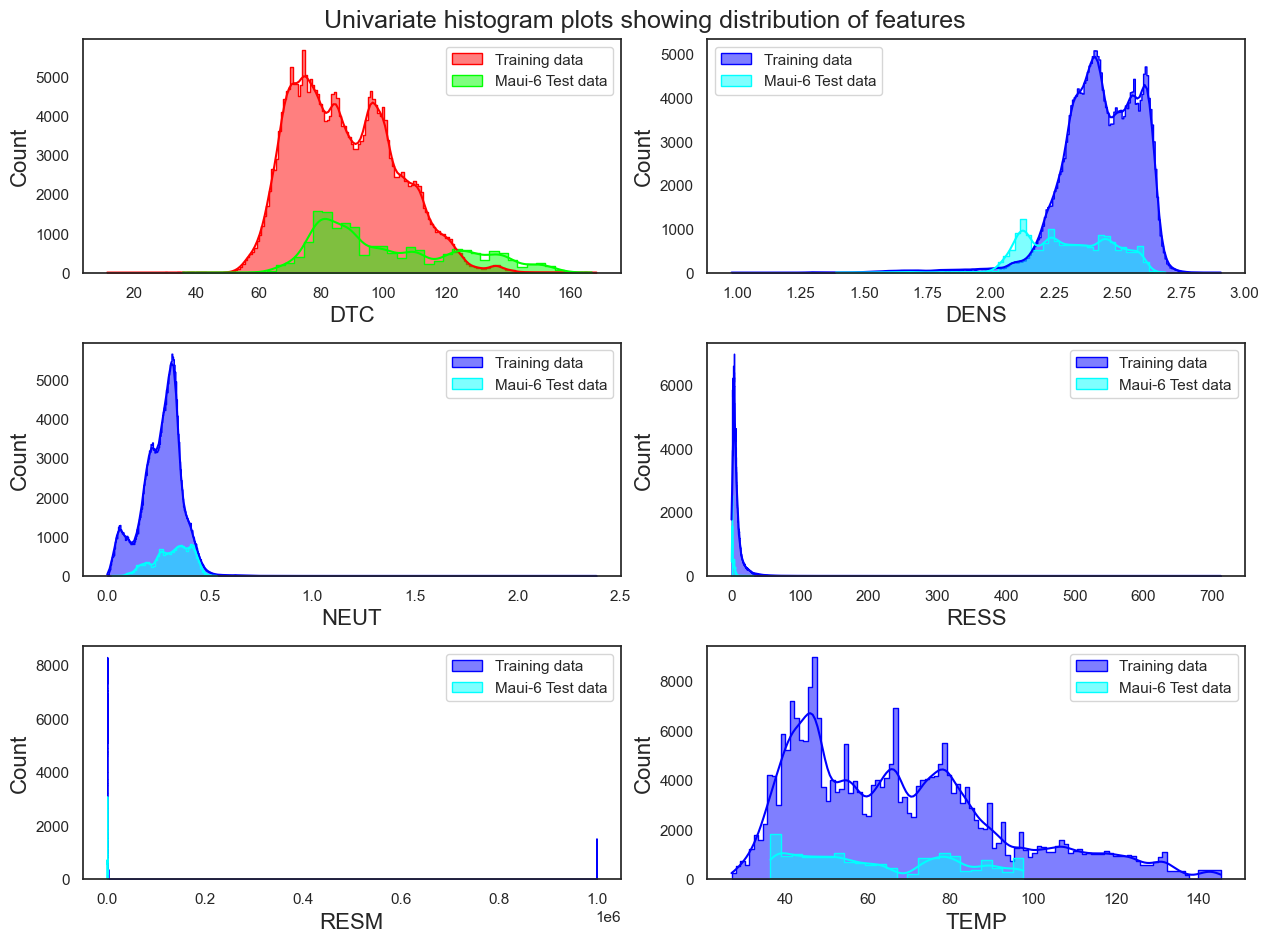

In [55]:
fig = plt.figure(figsize = (15,10))
#figsize = (18,12)
sns.set(font_scale=1)
sns.set_style(style= 'white')

fig.add_subplot(3,2,1)
ax1 = sns.histplot(x = y, stat = 'count',element = "step", kde = True,color = 'red', label = 'Training data')
ax1 = sns.histplot(x = df_test_unseen['DTC'], stat = 'count',element = "step", kde = True,color = 'lime',
                   label = 'Maui-6 Test data')
ax1.set_xlabel("DTC",fontsize = 16)
ax1.set_ylabel("Count",fontsize = 16)
ax1.legend()

fig.add_subplot(3,2,2)
ax2 = sns.histplot(x = X['DENS'], stat = 'count',element = "step", kde = True,color = 'blue', label = 'Training data')
ax2 = sns.histplot(x = df_test_unseen['DENS'], stat = 'count',element = "step", kde = True,color = 'aqua',
                   label = 'Maui-6 Test data')
ax2.set_xlabel("DENS",fontsize = 16)
ax2.set_ylabel("Count",fontsize = 16)
ax2.legend()

fig.add_subplot(3,2,3)
ax3 = sns.histplot(x = X['NEUT'], stat = 'count',element = "step", kde = True,color = 'blue',label = 'Training data')
ax3 = sns.histplot(x = df_test_unseen['NEUT'], stat = 'count',element = "step", kde = True,color = 'aqua',
                   label = 'Maui-6 Test data')
ax3.set_xlabel("NEUT",fontsize = 16)
ax3.set_ylabel("Count",fontsize = 16)
ax3.legend()

fig.add_subplot(3,2,4)
ax4 = sns.histplot(x = X['RESS'], stat = 'count',element = "step", kde = True,color = 'blue', label = 'Training data')
ax4 = sns.histplot(x = df_test_unseen['RESS'], stat = 'count',element = "step", kde = True,color = 'aqua',
                   label = 'Maui-6 Test data')
ax4.set_xlabel("RESS",fontsize = 16)
ax4.set_ylabel("Count",fontsize = 16)
ax4.legend()

fig.add_subplot(3,2,5)
ax5 = sns.histplot(x = X['RESM'], stat = 'count',element = "step", kde = True,color = 'blue', label = 'Training data')
ax5 = sns.histplot(x = df_test_unseen['RESM'], stat = 'count',element = "step", kde = True,color = 'aqua',
                   label = 'Maui-6 Test data')
ax5.set_xlabel("RESM",fontsize = 16)
ax5.set_ylabel("Count",fontsize = 16)
ax5.legend()

fig.add_subplot(3,2,6)
ax6 = sns.histplot(x = X['TEMP'], stat = 'count',element = "step", kde = True,color = 'blue', label = 'Training data')
ax6 = sns.histplot(x = df_test_unseen['TEMP'], stat = 'count',element = "step", kde = True,color = 'aqua',
                   label = 'Maui-6 Test data')
ax6.set_xlabel("TEMP",fontsize = 16)
ax6.set_ylabel("Count",fontsize = 16)
ax6.legend()

fig.suptitle('Univariate histogram plots showing distribution of features', fontsize  = 18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.16, hspace=0.3)
fig.subplots_adjust(top=0.95)

plt.savefig('Data_distribution.png', dpi = 1200,  bbox_inches='tight')
plt.show()

# Train Test Split

In [80]:
# splitting training and testing data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

# Preparing the Random Forest model

In [82]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred1 = model1.predict(X_val)

In [84]:
mae1 = metrics.mean_absolute_error(y_val, y_pred1)  #random forest regression
print("MAE_Linear: ", mae1 )

mse1 = metrics.mean_squared_error(y_val, y_pred1)  #random forest regression
print('MSE_Linear: ', mse1)

RMSE1 = mse1 ** 0.5 #random forest regression
print('RMSE_Linear: ', RMSE1)

r2_linear = metrics.r2_score(y_val,y_pred1)  # random forest regression
print("R2-Score Linear Regression: ",r2_linear)

MAE_Linear:  5.334002255684934
MSE_Linear:  54.65490251018659
RMSE_Linear:  7.392895407767283
R2-Score Linear Regression:  0.7976354745962297


In [25]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

MSE_Linear:  56.38938786939834


In [91]:
data_ML = {'y_val': y_val, 'y_pred1': y_pred1}

In [92]:
saved_dataML= pd.DataFrame(data = data_ML)
saved_dataML

,y_val,y_pred1
49290,94.8163,94.630102
71253,69.1184,74.776706
163363,86.8316,81.478948
196533,93.3914,96.727973
71962,124.1510,106.861690
...,...,...
227946,79.9139,91.360014
252568,72.9761,72.946014
116157,71.4699,75.525640
22548,102.6512,101.455549


In [90]:
y_val

49290      94.8163
71253      69.1184
163363     86.8316
196533     93.3914
71962     124.1510
            ...   
227946     79.9139
252568     72.9761
116157     71.4699
22548     102.6512
239305     68.5542
Name: DTC, Length: 53111, dtype: float64

In [89]:
y_pred1

array([ 94.63010193,  74.77670564,  81.47894846, ...,  75.52563972,
       101.45554911,  62.50915541])

# Residual plots for random forest regressor

In [86]:
# Calculate residuals
predicted = y_pred1
residuals = y_val - y_pred1

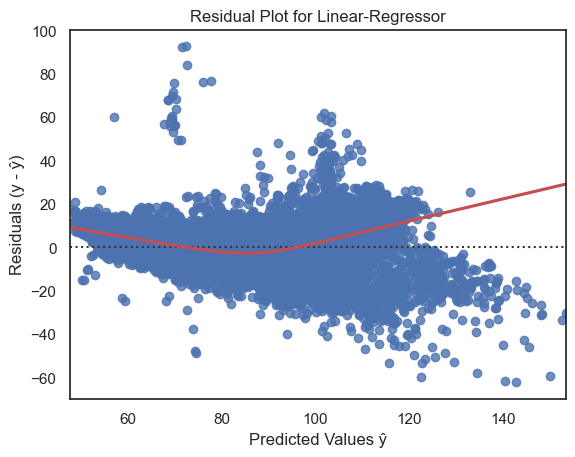

In [88]:
# residual plots for random forest regressor

sns.residplot(x = predicted, y =residuals, lowess=True, color='b', line_kws=dict(color="r"))
plt.xlabel('Predicted Values ŷ')
plt.ylabel('Residuals (y - ŷ)')
plt.title('Residual Plot for Linear-Regressor')
plt.show()

# Preparing the XGBoost model

In [27]:
model2 = xg.XGBRegressor(objective ='reg:linear')

In [28]:
# Fitting the model

model2.fit(X_train, y_train)

[16:51:36] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [29]:
# Predict from model2
y_pred2 = model2.predict(X_val)

# Residual plots for XGBoost regressor

In [75]:
# Calculate residuals
predicted2 = y_pred2
residuals2 = y_val - y_pred2

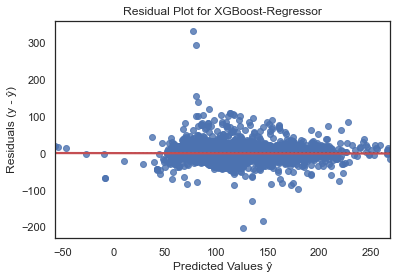

In [76]:
# residual plots for XGBoost regressor

sns.residplot(predicted2, residuals2, lowess=True, color='b', line_kws=dict(color="r"))
plt.xlabel('Predicted Values ŷ')
plt.ylabel('Residuals (y - ŷ)')
plt.title('Residual Plot for XGBoost-Regressor')
plt.show()

# Relative importance plots of training features used in model development

## Relative importance plot for Random Forest Regressor

In [84]:
features = X.columns

In [85]:
features

Index(['Depth', 'RHOB', 'NPHI', 'CALI', 'GR'], dtype='object')

In [86]:
rf_imp_features = model1.feature_importances_

In [87]:
rf_imp_features

array([0.26697543, 0.51147282, 0.11328451, 0.0722246 , 0.03604264])

Text(0.5, 1.0, 'Feature Importance - Random Forest regressor')

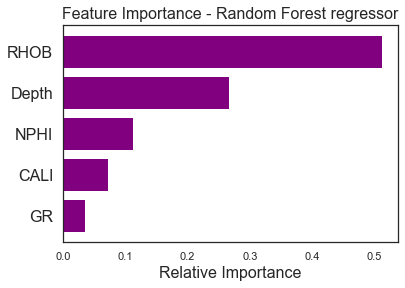

In [88]:
indices = np.argsort(rf_imp_features)[-5:]
plt.barh(range(len(indices)),rf_imp_features[indices], color = 'purple')
plt.yticks(range(len(indices)),[features[i] for i in indices], fontsize = 16)
plt.xlabel('Relative Importance', fontsize = 16)
plt.title('Feature Importance - Random Forest regressor', fontsize = 16)

## Relative importance plot for XGBoost Regressor

In [89]:
# XGB  freature importances

In [90]:
xgb_imp_features = model2.feature_importances_

Text(0.5, 1.0, 'Feature Importance - XGBoost Regressor')

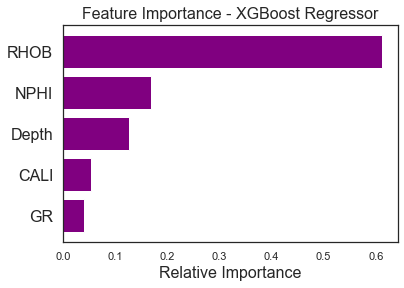

In [91]:
indices2 = np.argsort(xgb_imp_features)[-5:]
plt.barh(range(len(indices2)),xgb_imp_features[indices2], color = 'purple')
plt.yticks(range(len(indices2)),[features[i] for i in indices2], fontsize = 16)
plt.xlabel('Relative Importance', fontsize = 16)
plt.title('Feature Importance - XGBoost Regressor', fontsize = 16)

# Model Evaluation

The following parameters are used for model evaluation
1. Mean absolute error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)
4. R2 Score (Coefficient of determination)


### 1. Mean absolute error (MAE)
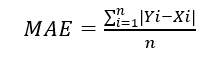

In [92]:
mae_rf = metrics.mean_absolute_error(y_val, y_pred)  #random forest regression
print("MAE_rf: ", mae_rf )
mae_xgb = metrics.mean_absolute_error(y_val, y_pred2)  # XGboost
print("MAE_xgb: ", mae_xgb )

MAE_rf:  1.713144157825044
MAE_xgb:  3.259831259121052


### 2. Mean Squared Error (MSE)
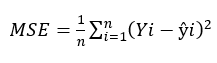

In [47]:
mse_rf = metrics.mean_squared_error(y_val, y_pred)  #random forest regression
print('MSE_rf: ', mse_rf)
mse_xgb = metrics.mean_squared_error(y_val, y_pred2) # XGboost
print('MSE_xgb: ', mse_xgb)

MSE_rf:  20.733183393018045
MSE_xgb:  32.09804712259729


### 3. Root Mean Squared Error (RMSE)
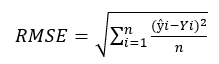

In [49]:
RMSE_rf = mse_rf ** 0.5 #random forest regression
print('RMSE_rf: ', RMSE_rf)
RMSE_xgb = mse_xgb ** 0.5 # XGboost
print('RMSE_xgb: ', RMSE_xgb)

RMSE_rf:  4.55337055300994
RMSE_xgb:  5.665513844533194


### 4. R2 Score (Coefficient of determination)
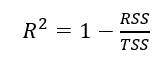

In [44]:
r2_forest = metrics.r2_score(y_val,y_pred)  # random forest regression
print("R2-Score Random Forest: ",r2_forest)
r2_xgb = metrics.r2_score(y_val,y_pred2) # XGboost
print("R2-Score XGBoost: ", r2_xgb)

R2-Score Random Forest:  0.943688316925022
R2-Score XGBoost:  0.9128211513576787


# Test 

In [52]:
df_test

,Depth,CALI,GR,DT,NPHI,RHOB,PEF
0,120.549,NaN,8.4766,NaN,NaN,NaN,NaN
1,120.701,NaN,10.4453,NaN,NaN,NaN,NaN
2,120.853,NaN,13.9844,NaN,NaN,NaN,NaN
3,121.006,NaN,16.7656,NaN,NaN,NaN,NaN
4,121.158,NaN,16.3906,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19781,3135.173,NaN,NaN,NaN,NaN,NaN,NaN
19782,3135.325,NaN,NaN,NaN,NaN,NaN,NaN
19783,3135.478,NaN,NaN,NaN,NaN,NaN,NaN
19784,3135.630,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_test_temp = df_test[['Depth','RHOB','NPHI','GR','CALI','DT']]
df_test_temp.dropna(inplace=True)

# dt_test_temp is a temporary variable to store dataset with ['Depth','RHOB','NPHI','GR','CALI'] feature and no NaN values

<AxesSubplot:>

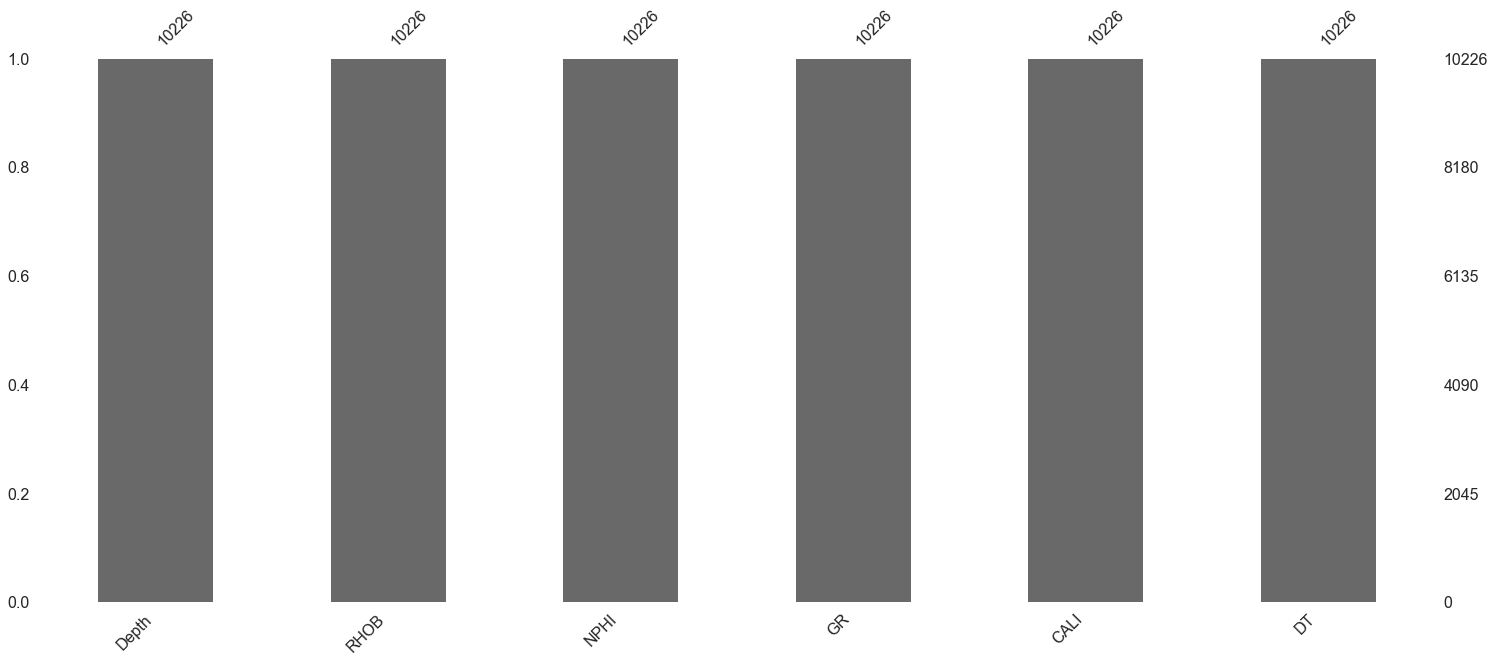

In [56]:
mno.bar(df_test_temp)

In [60]:
X_test = df_test_temp[['Depth', 'RHOB', 'NPHI', 'CALI', 'GR']]
y_test_org = df_test_temp['DT'] # original values of dataset

In [61]:
y_test_pred = model1.predict(X_test)

In [62]:
y_test_pred2 = model2.predict(X_test)


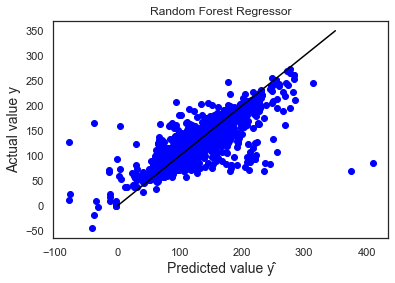

In [63]:
plt.scatter(y_val, y_pred,c = 'blue')
plt.plot((0,350),(0,350),'black')
plt.ylabel('Actual value y', fontsize=14)
plt.xlabel('Predicted value ŷ', fontsize=14)
plt.title('Random Forest Regressor')
plt.show()

In [64]:
# converting to numpy array
y_val_array = np.array(y_val)

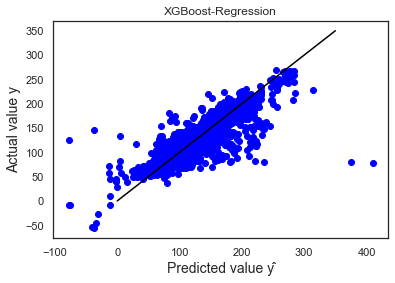

In [68]:
# plt.scatter(y_val, y_pred2)
# plt.plot((-100,350),(-100,350),'black')
# # plt.Xlim(40,140)
# # plt.ylim(40,140)

# for XG boost

plt.scatter(y_val, y_pred2,c='blue')
plt.plot((0,350),(0,350),'black')
plt.ylabel('Actual value y', fontsize=14)
plt.xlabel('Predicted value ŷ', fontsize=14)
plt.title('XGBoost-Regression')
plt.show()

## The subplot() Function
The subplot() function takes three arguments that describes the layout of the figure.

The layout is organized in rows and columns, which are represented by the first and second argument.

The third argument represents the index of the current plot.

plt.subplot(1, 2, 1)
#the figure has 1 row, 2 columns, and this plot is the first plot.

plt.subplot(1, 2, 2)
#the figure has 1 row, 2 columns, and this plot is the second plot.

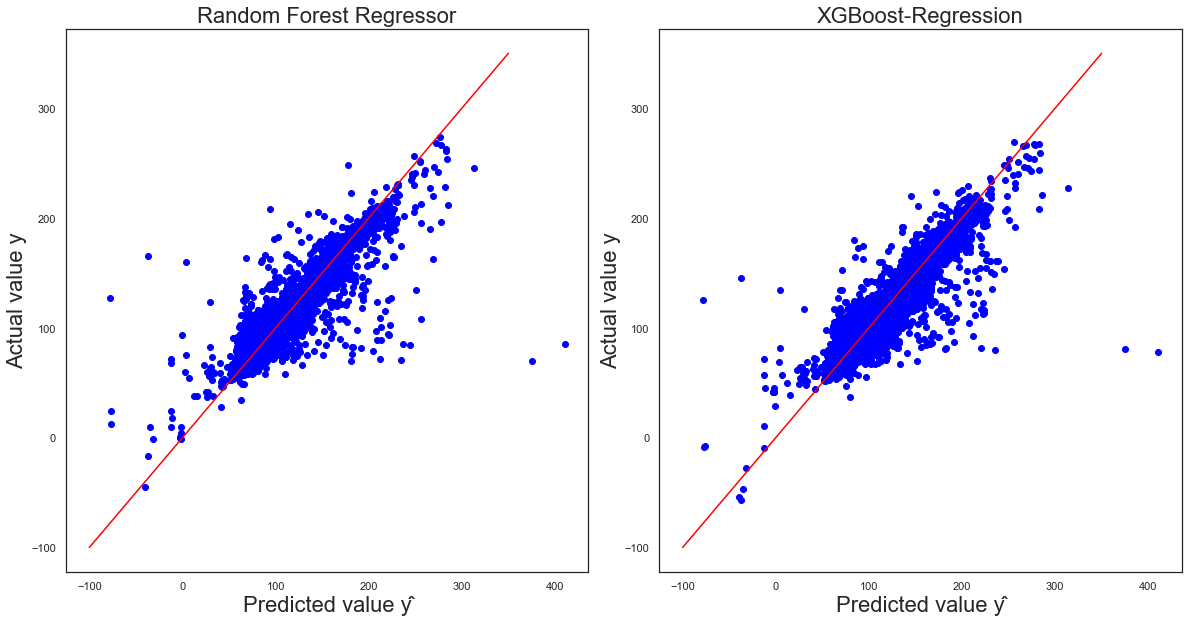

In [69]:
plt.figure(plt.figure(figsize = (20,10)))

#1
plt.subplot(1,2,1)
plt.scatter(y_val_array, y_pred,c = 'blue')
plt.plot((-100,350),(-100,350),'red')
plt.ylabel('Actual value y', fontsize=22)
plt.xlabel('Predicted value ŷ', fontsize=22)
plt.title('Random Forest Regressor', fontsize=22)
#plt.show()

#2
plt.subplot(1,2,2)
plt.scatter(y_val_array, y_pred2,c = 'blue')
plt.plot((-100,350),(-100,350),'red')
plt.ylabel('Actual value y', fontsize=22)
plt.xlabel('Predicted value ŷ', fontsize=22)
plt.title('XGBoost-Regression', fontsize=22)
#plt.show()



plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.135, hspace=0.1)


# KDE plots

(50.0, 150.0)

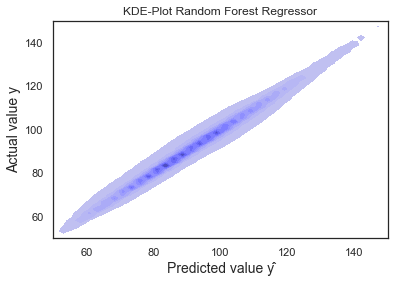

In [79]:
sns.kdeplot(y_val, y_pred, fill = True, shade = True, color = 'Blue')
plt.ylabel('Actual value y', fontsize=14)
plt.xlabel('Predicted value ŷ', fontsize=14)
plt.title('KDE-Plot Random Forest Regressor')
plt.xlim(50,150)
plt.ylim(50,150)

(50.0, 140.0)

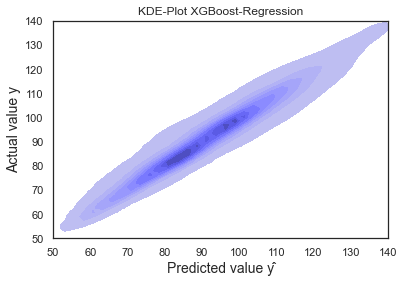

In [80]:
sns.kdeplot(y_val, y_pred2, fill = True, shade = True, color = 'Blue')
plt.ylabel('Actual value y', fontsize=14)
plt.xlabel('Predicted value ŷ', fontsize=14)
plt.title('KDE-Plot XGBoost-Regression')
plt.xlim(50,140)
plt.ylim(50,140)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

# Results

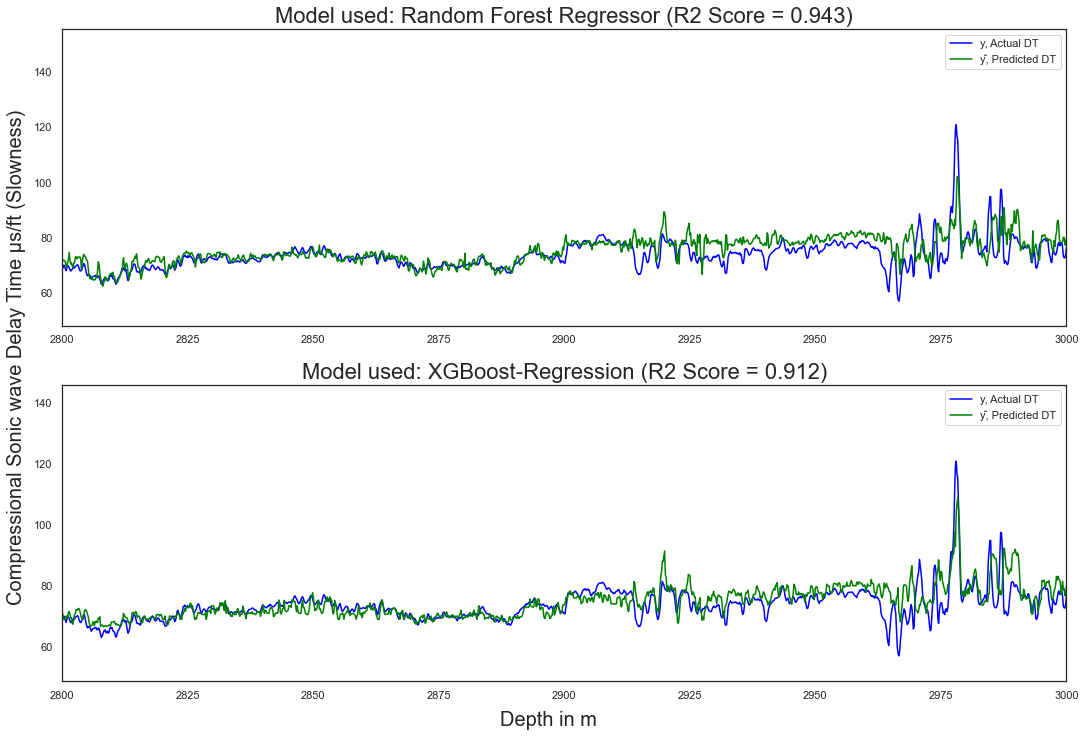

In [73]:
fig = plt.figure(figsize = (18,12))
#plt.figure(figsize = (15,5))

fig.add_subplot(2,1,1)
plt.plot(df_test_temp['Depth'],y_test_org, label = 'y, Actual DT', color = 'Blue')
plt.plot(df_test_temp['Depth'],y_test_pred,label ='ŷ, Predicted DT', color = 'Green')
#plt.xlabel('Depth in m')
#plt.ylabel('Compressional Sonic wave Delay Time µs/ft (Slowness)')
plt.xlim(2800,3000)
plt.title('Model used: Random Forest Regressor (R2 Score = 0.943)', fontsize = 22)
plt.legend()


fig.add_subplot(2,1,2)
plt.plot(df_test_temp['Depth'],y_test_org, label = 'y, Actual DT', color = 'Blue')
plt.plot(df_test_temp['Depth'],y_test_pred2,label ='ŷ, Predicted DT', color = 'Green')
#plt.xlabel('Depth in m')
#plt.ylabel('Compressional Sonic wave Delay Time µs/ft (Slowness)')
plt.xlim(2800,3000)
plt.title('Model used: XGBoost-Regression (R2 Score = 0.912)', fontsize = 22)
plt.legend()
# commonm label
fig.text(0.09, 0.5, 'Compressional Sonic wave Delay Time µs/ft (Slowness)', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0.08, 'Depth in m', ha='center', va='center', fontsize = 20)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
